In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


<Axes: xlabel='YEAR'>

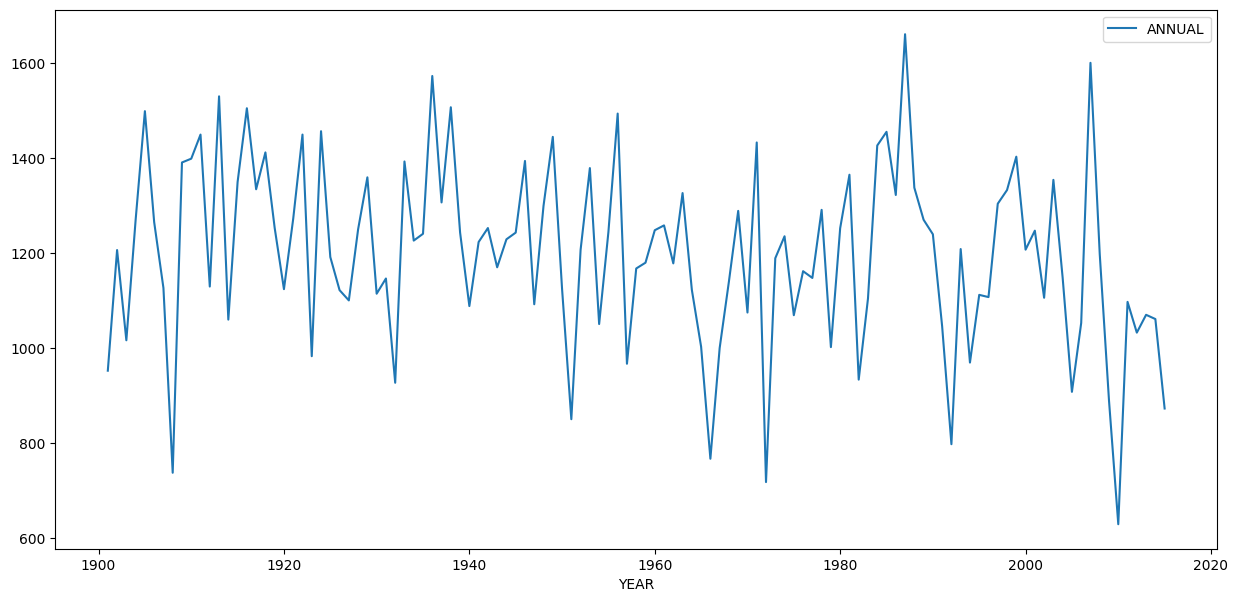

In [30]:
df=pd.read_csv('/content/output.csv')
df.head()

# Updating the header
df.columns=["YEAR","ANNUAL"]
df.head()
df.describe()
df.set_index('YEAR',inplace=True)

from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.plot()


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['ANNUAL'])

In [ ]:
def adfuller_test(ANNUAL):
    result=adfuller(ANNUAL)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        if result[1] <= 0.05:
           print("Data is stationary")
        else:
          print("non-stationary ")

adfuller_test(df['ANNUAL'])

ADF Test Statistic : -9.175273959822484
Data is stationary
p-value : 2.329258451598752e-15
Data is stationary
#Lags Used : 0
Data is stationary
Number of Observations : 114
Data is stationary


In [ ]:
df['ANNUAL First Difference'] = df['ANNUAL'] - df['ANNUAL'].shift(1)
df['Seasonal First Difference']=df['ANNUAL']-df['ANNUAL'].shift(12)
df.head()

,ANNUAL,ANNUAL First Difference,Seasonal First Difference,First Difference
YEAR,,,,
1901,952.3,NaN,NaN,NaN
1902,1206.2,253.9,NaN,253.9
1903,1016.3,-189.9,NaN,-189.9
1904,1269.5,253.2,NaN,253.2
1905,1498.5,229.0,NaN,229.0


In [ ]:
# Again testing if data is stationary
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.176603496806558
Data is stationary
p-value : 0.000721632366828109
Data is stationary
#Lags Used : 11
Data is stationary
Number of Observations : 91
Data is stationary


<Axes: xlabel='YEAR'>

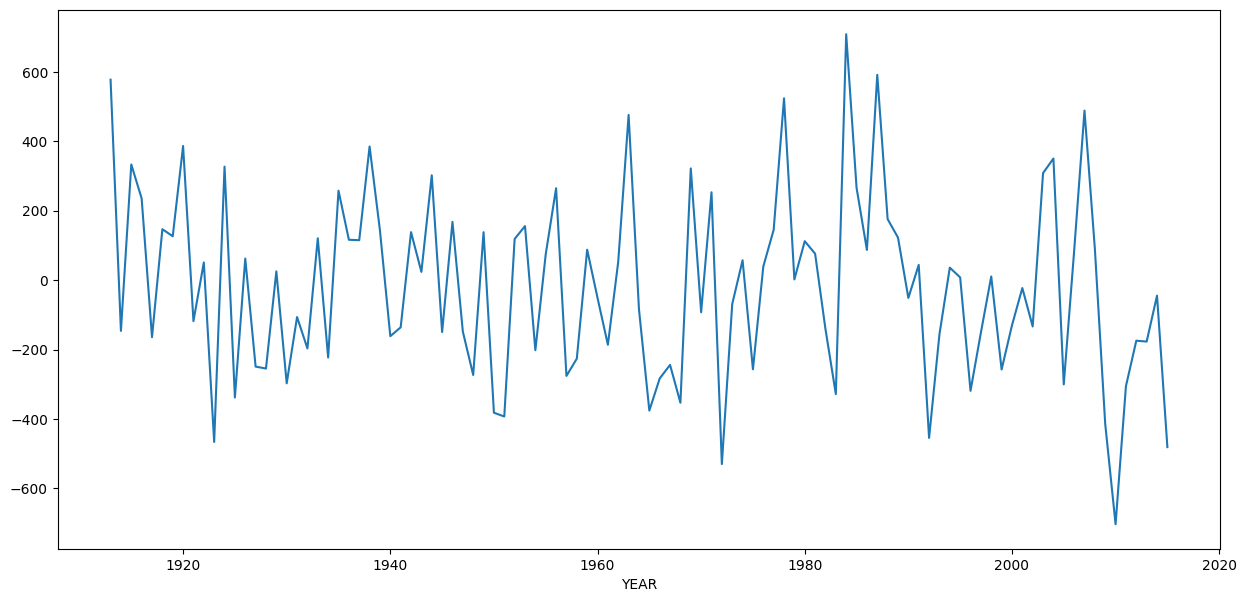

In [ ]:
df['Seasonal First Difference'].plot()

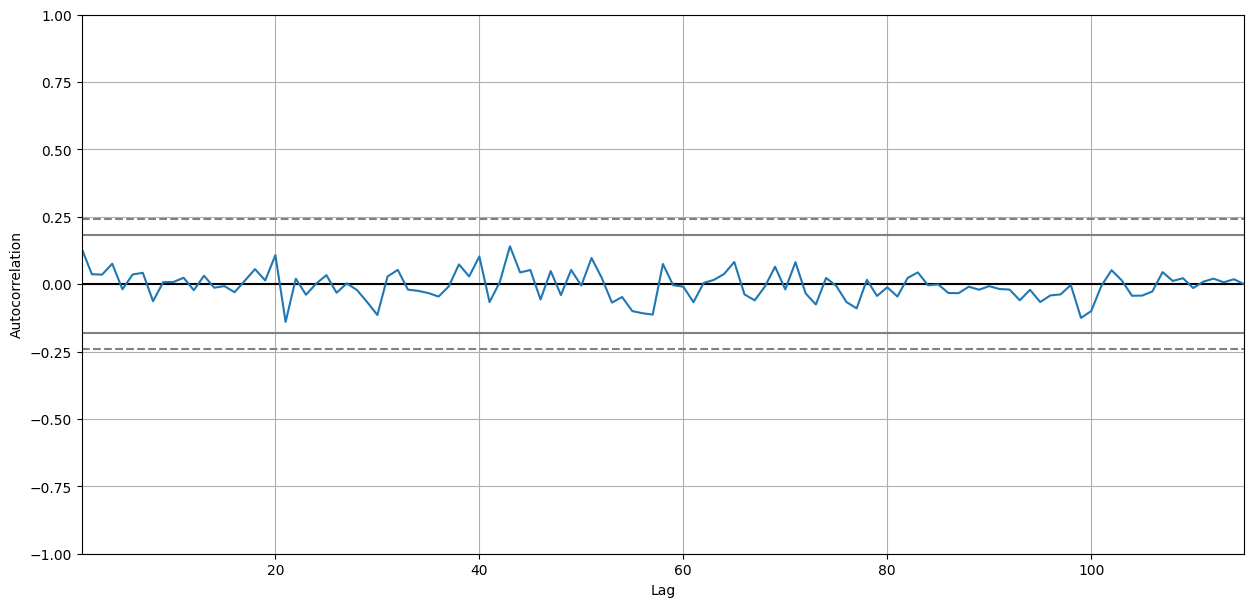

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['ANNUAL'])
plt.show()

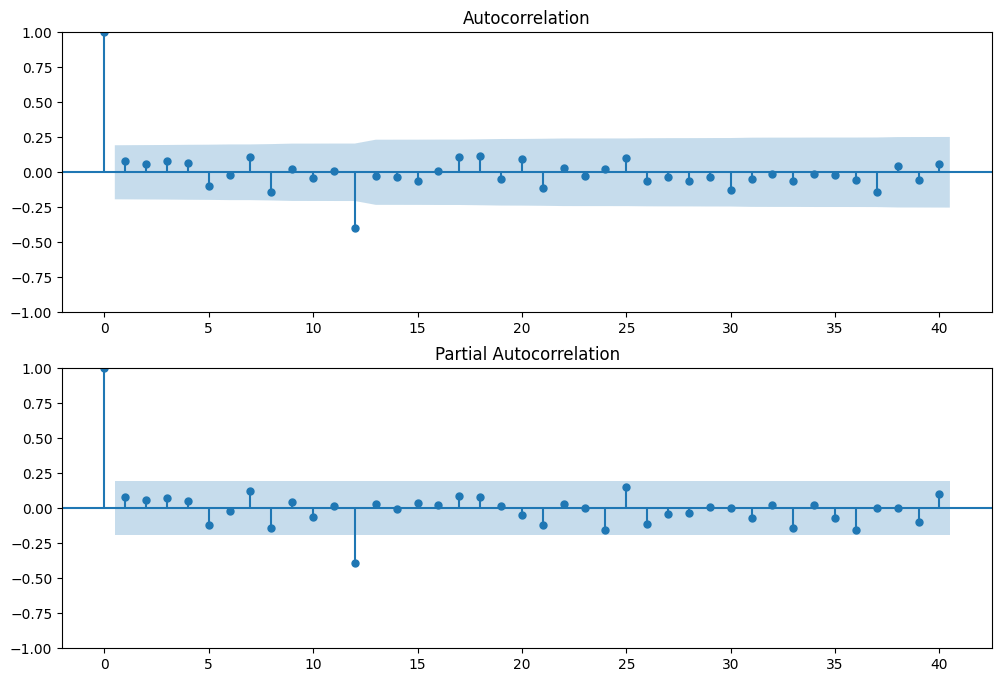

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [17]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['ANNUAL'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 ANNUAL   No. Observations:                  115
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -763.407
Date:                Mon, 15 Jan 2024   AIC                           1532.813
Time:                        16:16:18   BIC                           1541.022
Sample:                             0   HQIC                          1536.145
                                - 115                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1127      0.100      1.132      0.258      -0.082       0.308
ma.L1         -0.9589      0.049    -19.455      0.000      -1.055      -0.862
sigma2      3.745e+04   4965.111      7.543      0.0

<Axes: xlabel='YEAR'>

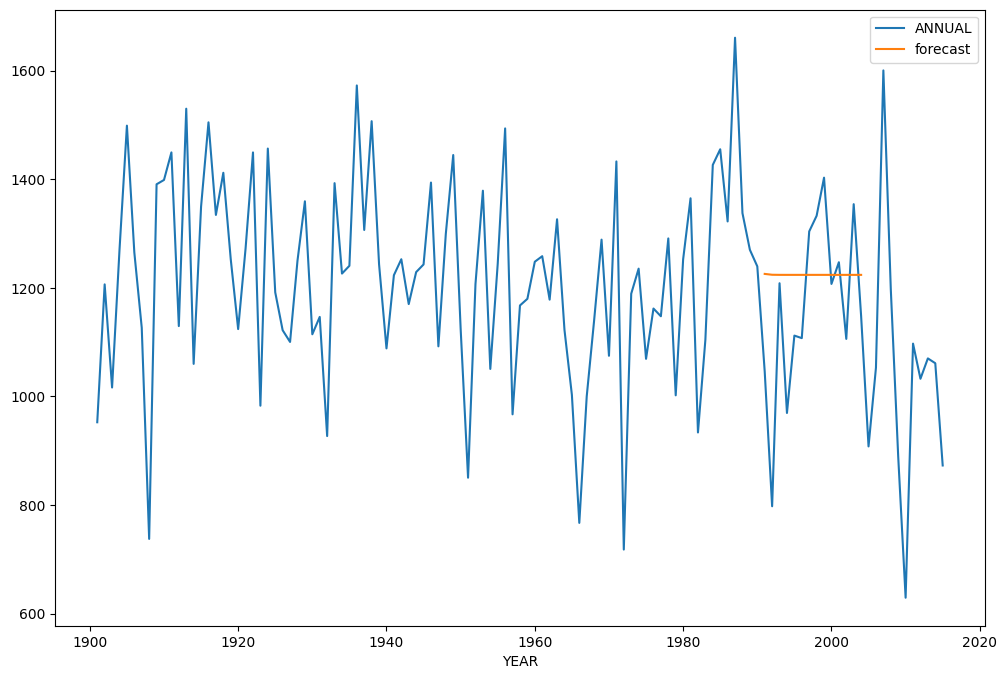

In [18]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['ANNUAL','forecast']].plot(figsize=(12,8))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='YEAR'>

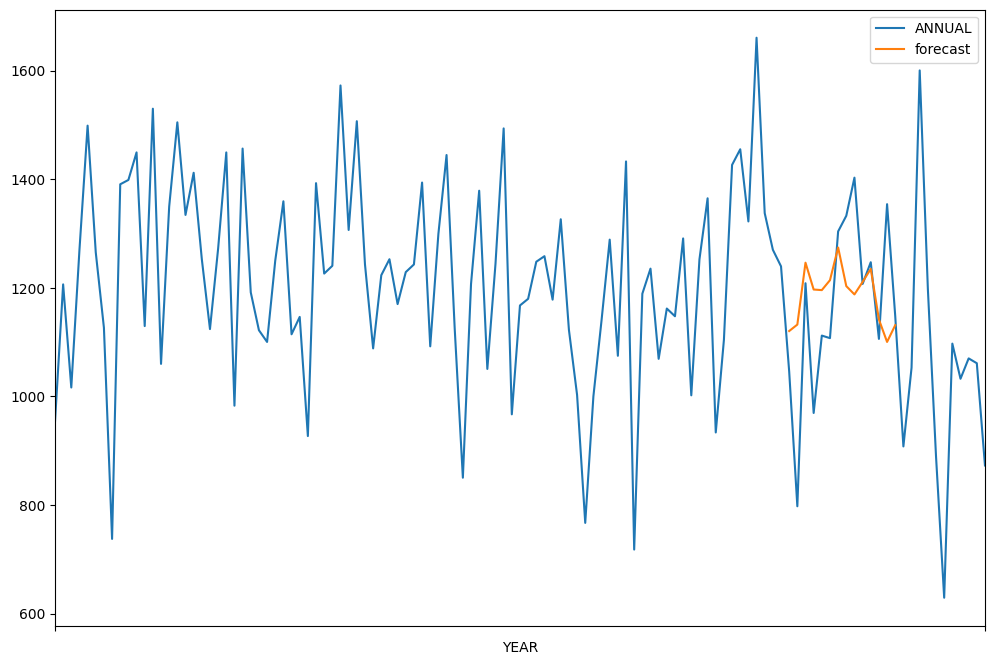

In [51]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['ANNUAL'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['ANNUAL','forecast']].plot(figsize=(12,8))

<ipython-input-53-87098fc811a6>:2: UserWarning: Discarding nonzero nanoseconds in conversion.
  future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]


<Axes: >

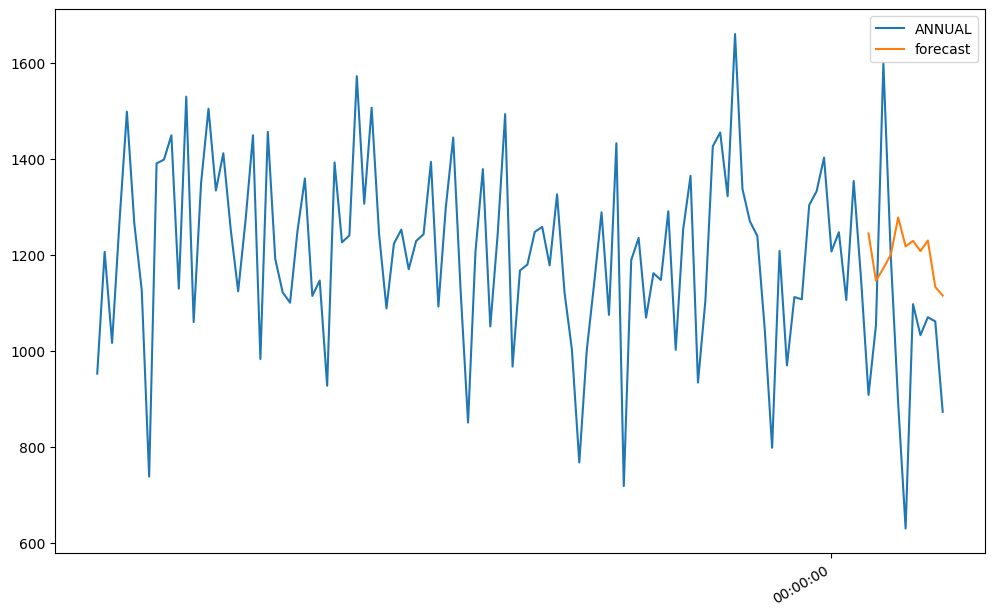

In [53]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df.tail()

future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['ANNUAL', 'forecast']].plot(figsize=(12, 8))